#### __Bài tập 2:__ Tự động cắt một hình ảnh bằng cách sử dụng bao lồi của đối tượng trong đó

#### __Giải thích code__

#### 1. Nhập các thư viện cần thiết

In [1]:
# Image từ thư viện PIL để xử lý ảnh
from PIL import Image                               
# imread từ skimage.io để đọc ảnh
from skimage.io import imread                       
# convex_hull_image từ skimage.morphology để tính toán bao lồi của ảnh nhị phân
from skimage.morphology import convex_hull_image    
# matplotlib.pyplot để vẽ đồ thị và hiển thị ảnh
import matplotlib.pyplot as plt                     
# rgb2gray từ skimage.color để chuyển ảnh sang grayscale
from skimage.color import rgb2gray                  
# numpy để xử lý mảng
import numpy as np                                  

#### 2. Đọc và hiển thị ảnh đầu vào

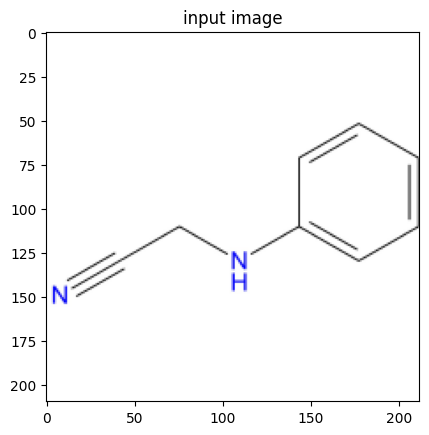

In [2]:
# Đọc ảnh từ đường dẫn
im = imread('../images/organic.png')                
# Hiển thị ảnh đầu vào
plt.imshow(im)                                      
plt.title('input image')
plt.show()

#### 3. Chuyển đổi ảnh sang grayscale và tạo ảnh nhị phân

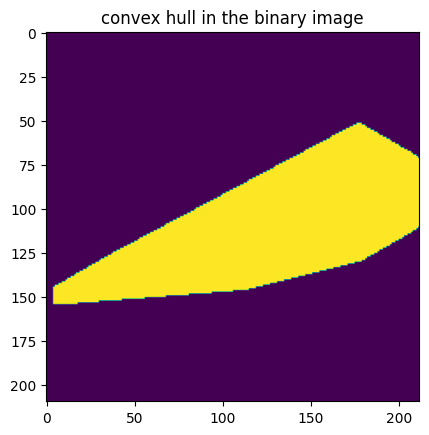

In [3]:
# Chuyển đổi ảnh sang grayscale và đảo ngược giá trị pixel (1 - giá trị pixel)
im1 = 1 - rgb2gray(im)                          
# Đặt ngưỡng threshold là 0.5
threshold = 0.5                                 
# Tạo ảnh nhị phân bằng cách đặt các giá trị pixel nhỏ hơn ngưỡng thành 0 và các giá trị pixel lớn hơn hoặc bằng ngưỡng thành 1
im[im < threshold] = 0
im1[im1 >= threshold] = 1
# Tính toán bao lồi cảu ảnh nhị phân im1 và lưu kết quả vào chull
chull = convex_hull_image(im1)
# Hiển thị ảnh bao lồi
plt.imshow(chull)
plt.title('convex hull in the binary image')
# Lưu ảnh bao lồi
plt.savefig('convex_hull_organic.jpg')
plt.show()

#### 4. Cắt ảnh dựa trên bao lồi và hiển thị kết quả

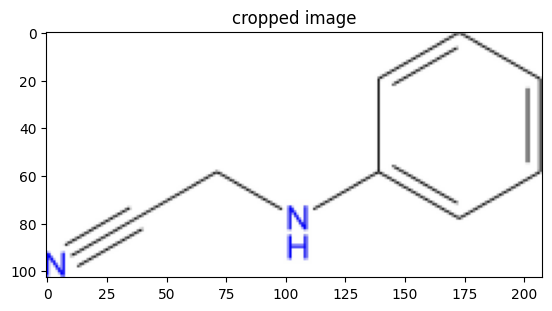

In [4]:
# Chuyển đổi ảnh bao lồi chull sang định dạng uint8 và nhân với 255 để tạo ảnh nhị phân
# Sử dụng hàm getbbox() để lấy hộp giới hạn (bounding box) của ảnh bao lồi
imageBox = Image.fromarray((chull*255).astype(np.uint8)).getbbox()
# Cắt ảnh gốc im dựa trên hộp giới hạn và lưu kết quả vào cropped
cropped = Image.fromarray(im).crop(imageBox)
# Lưu ảnh đã cắt
cropped.save('organic_cropped.jpg')
# Hiển thị ảnh đã cắt
plt.imshow(cropped)
plt.title('cropped image')
plt.savefig('cropped_organic.jpg')
plt.show()